In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_target():
    # Generate the target function f
    div_points = np.random.rand(2, 2)
    w1 = (div_points[1, 1] - div_points[0, 1])/(div_points[1, 0] - div_points[0, 0])
    w0 = div_points[0, 1] - div_points[0, 0]*w1
    w = np.array([w0, w1, -1])
    return w

In [3]:
def generate_sample(num_points, w):
    # Generate the test points and classify
    X = np.ones([num_points, 3])
    X[:, 1:3] = np.random.rand(num_points, 2)
    y = np.sign(np.dot(X, w))
    return X, y

In [ ]:
def log_regression(training, g_init=np.zeros(3), tol=1e-6, max_iter=10**4, eta=0.1):
    g = g_init
    iters = 0
    n_points, n_cols = training.shape
    y = training[:, -1]
    X = training[:, 0:n_cols-1]
    error = tol+1

    while error > tol and iters < max_iter:
        inds = np.random.permutation(n_points)
        old = g
        for i in inds:
            g = g + eta*(y[i]*X[i,:])/(1 + np.exp(y[i]*np.dot(X[i,:], g)))
        iters += 1
        error = np.linalg.norm(g - old)

    return g, iters

In [4]:
NPOINTS = 10**2
w = generate_target()
training = np.zeros([NPOINTS, 4])
training[:, 0:3], training[:, 3] = generate_sample(NPOINTS, w)

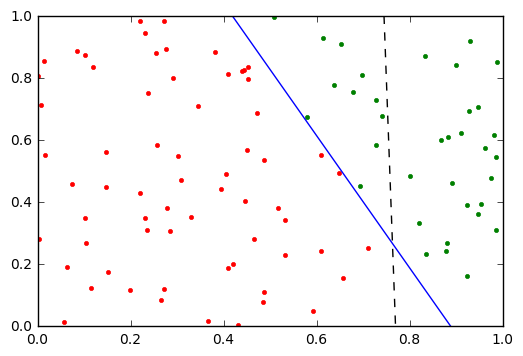

In [7]:
g = -g/g[2]
w0, w1 = w[0], w[1]
g0, g1 = g[0], g[1]

# Split the test points into the two classification groups
positives = training[training[:,-1]>0,:]
negatives = training[training[:,-1]<0,:]

# Plot f, g, and \mathbf{x}
x = np.linspace(0,1)
xpos = positives[:,1]
ypos = positives[:,2]
xneg = negatives[:,1]
yneg = negatives[:,2]

plt.plot(xneg,yneg,'.g')
plt.plot(xpos,ypos,'.r')
plt.plot(x,w1*x+w0)
plt.plot(x,g1*x+g0,'--k')
plt.axis([0,1,0,1])
#plt.legend(['Negative','Positive'])
plt.show()